In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB  # Tambahkan import untuk GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('VSRR_Provisional_Drug_Overdose_Death_Counts.csv')
data.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,Heroin (T40.1),NaN,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,Psychostimulants with abuse potential (T43.6),NaN,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",NaN,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,Natural & semi-synthetic opioids (T40.2),NaN,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,"Natural & semi-synthetic opioids, incl. methad...",NaN,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN


In [3]:
# Buang kolom 'Footnote Symbol' karena tidak relevan untuk klasifikasi
data = data.drop('Footnote Symbol', axis=1)

# Pilih kolom yang akan diprediksi (target)
target = 'Year'

X = data[[target]]  # Hanya menggunakan kolom target sebagai fitur
y = data[target]

# Bagi dataset menjadi data latih (70%) dan data uji (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [4]:
# Inisialisasi model Naive Bayes
nb_model = GaussianNB()

# Latih model dengan data latih
nb_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = nb_model.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [5]:
# Tampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Laporan Klasifikasi:
              precision    recall  f1-score   support

        2015       1.00      1.00      1.00      2833
        2016       1.00      1.00      1.00      2927
        2017       1.00      1.00      1.00      2935
        2018       1.00      1.00      1.00      2907
        2019       1.00      1.00      1.00      2871
        2020       1.00      1.00      1.00      2880
        2021       1.00      1.00      1.00      2882
        2022       1.00      1.00      1.00      2800
        2023       1.00      1.00      1.00       725

    accuracy                           1.00     23760
   macro avg       1.00      1.00      1.00     23760
weighted avg       1.00      1.00      1.00     23760



In [6]:
# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi Model:", accuracy)


Akurasi Model: 1.0


In [8]:
# Menambahkan kolom 'Year' ke data uji
X_test['Year'] = data['Year']

# Menginisialisasi daftar untuk menyimpan jumlah prediksi yang benar per tahun
prediksi_per_tahun = []

# Memecah data uji menjadi tahunan dan menghitung jumlah prediksi yang benar per tahun
for tahun in range(2015, 2024):
    data_tahun = X_test[X_test['Year'] == tahun]
    y_pred_tahun = y_pred[X_test['Year'] == tahun]
    prediksi_tahun = (data_tahun['Year'] == y_pred_tahun).sum()  # Ganti 'target_column' dengan nama kolom target Anda
    prediksi_per_tahun.append((tahun, prediksi_tahun))

# Cetak hasil prediksi yang benar per tahun
for tahun, prediksi in prediksi_per_tahun:
    print(f'Prediksi di tahun {tahun}: {prediksi}')
    
y_pred.shape[0]

Prediksi di tahun 2015: 2833
Prediksi di tahun 2016: 2927
Prediksi di tahun 2017: 2935
Prediksi di tahun 2018: 2907
Prediksi di tahun 2019: 2871
Prediksi di tahun 2020: 2880
Prediksi di tahun 2021: 2882
Prediksi di tahun 2022: 2800
Prediksi di tahun 2023: 725


23760

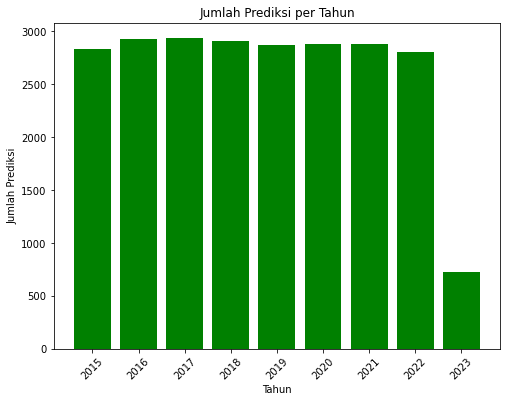

In [12]:
prediksi_per_tahun = []

# Memecah data uji menjadi tahunan dan menghitung jumlah prediksi yang benar per tahun
for tahun in range(2015, 2024):
    data_tahun = X_test[X_test['Year'] == tahun]
    y_pred_tahun = y_pred[X_test['Year'] == tahun]
    prediksi_tahun = (data_tahun['Year'] == y_pred_tahun).sum()  # Ganti 'Year' dengan nama kolom target Anda
    prediksi_per_tahun.append(prediksi_tahun)

# Menyiapkan tahun-tahun sebagai label
tahun_label = [str(tahun) for tahun in range(2015, 2024)]

# Plot diagram batang jumlah prediksi yang benar per tahun
plt.figure(figsize=(8, 6))
plt.bar(tahun_label, prediksi_per_tahun, color='green')
plt.title('Jumlah Prediksi per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Prediksi')
plt.xticks(rotation=45)  # Rotasi label tahun agar lebih mudah dibaca
plt.show()
